##### Sergio Duque Mejía, c.c 1036654435
##### Mail: sergio.duquem@udea.edu.co

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

We are going to make a digit classification "prediction", using LogisticRegression from sklearn for the data called mnist_test

1. Import the dataset "mnist_test.csv" and take the images and target

In [3]:
digits = pd.read_csv('mnist_test.csv')
digits

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_np = digits.to_numpy() # digits converted to np array (images)
label = digits["label"].to_numpy() # labels converted to np array (target)

As you may see, we are going to predict the label of a new image that is added, to do this, first we split the data into training data and testing data.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data_np,label,test_size=0.2,random_state=100)

In [7]:
def splitShape(xtrain,xtest,ytrain,ytest):
    print(X_train.shape, 'X_train')
    print(y_train.shape, 'y_train') 
    print(X_test.shape, 'X_test')
    print(y_test.shape, 'y_test')

We got 80% of the data into the trainting data, and 20% of the data into the testing data

In [8]:
splitShape(X_train,X_test,y_train,y_test)

(8000, 785) X_train
(8000,) y_train
(2000, 785) X_test
(2000,) y_test


Import the Logistic regression model, fit it with the training data and make predictions using the testing data

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_predict = model.predict(X_test)

In [13]:
y_predict.shape

(2000,)

We made a prediction for all the X_test data so we can compare with the actual value of y_test. To do that, we can show a list of the y_predicted with y_test and compare, but it is better to show the actual image of the X_test and compare it in the title with the y_predicted

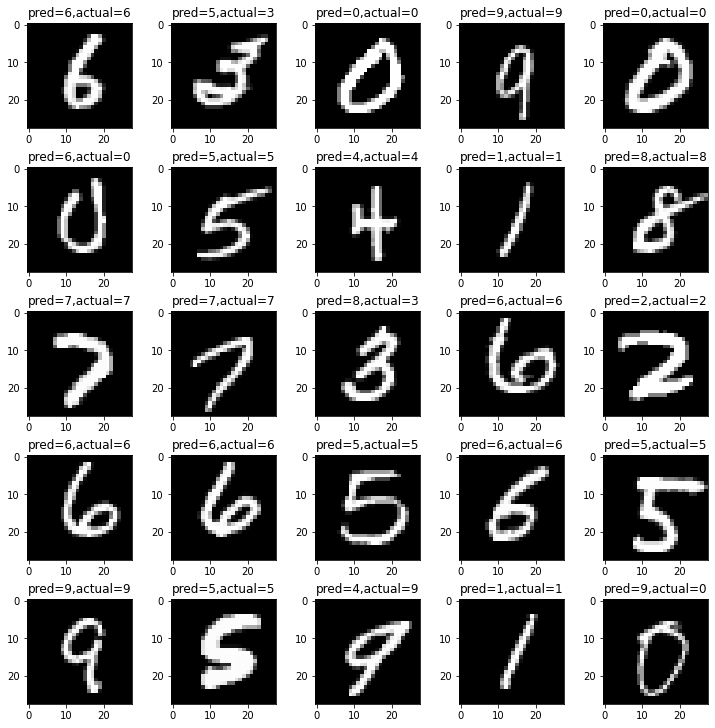

In [14]:
fig, ax = plt.subplots(5,5, figsize=(10,10),constrained_layout=True) # figure 5x5 images
np.random.seed(30) # random seed to find bad aproximations.
for i in range(5): # horizontal axis
    for j in range(5): # vertical axis
        r = np.random.randint(len(X_test)) # pick a random number 
        image = np.reshape(X_test[r][:-1], [28,28])
        ax[i,j].imshow(image,cmap=plt.cm.gray) # divide the random row in 28x28 arrays and draw in a plot. 
        ax[i,j].set_title('pred={},actual={}'.format(y_predict[r],y_test[r])) # Title of the respective number

As you could see, some of the values are not matching, this is because the model can not predict those. if we see the score that is basically how the model performs on new data or the accuracy (fraction of correct predictions), we see that the model can not predict 12.55% of the data

In [15]:
model.score(X_test,y_test)

0.8745

We can take all the y_predicted that are not the same as y_test. then show as an image the actual predictions that are bad

In [16]:
i = 0
badClassification = []
for predict, actual in zip(y_predict, y_test):
    if predict != actual: 
        badClassification.append(i)
    i +=1

First 5 bad predictions:

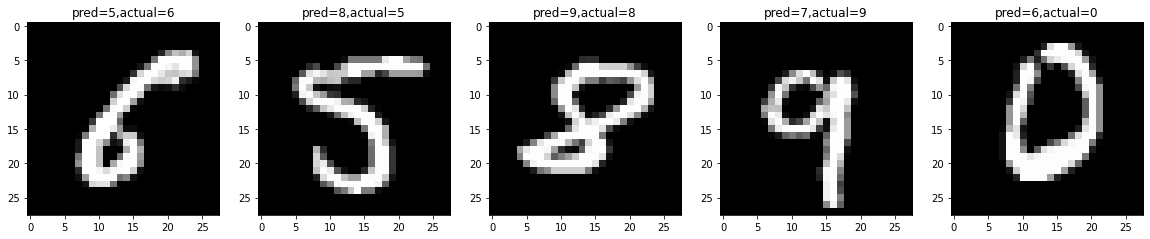

In [17]:
plt.figure(figsize=(20,4))
for pI, w in enumerate(badClassification[:5]):
    plt.subplot(1,5,pI+1)
    image = np.reshape(X_test[w][1:], [28,28])
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('pred={},actual={}'.format(y_predict[w],y_test[w]))

In [ ]:
# Well done!